<a href="https://colab.research.google.com/github/alberttuwan1/JAM_Stream_Cipher/blob/main/JAMStreamCipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Idea

In [ ]:
import random
random.seed(911)

In [ ]:
# prompt: generate 26 number random range from 0-25 into an array

import random

random.seed(911)

key = [random.randint(0, 25) for _ in range(26)]
key0 = 3

In [ ]:
def encrypt(PT, key, key0):
    def enc(text, key, key0):
        text = text.upper()
        ET = []

        ET.append(chr(((ord(text[0]) + key0 - 65) % 26) + 65))
        curr_idx = (ord(text[0]) + ord(ET[-1])) % 26
        text = text[1:]
        for i in range(len(text)):
            if text[i] == " ":
                ET.append(" ")
            else:
                used_key = key[curr_idx]
                ET.append(chr(((ord(text[i]) + used_key - 65) % 26) + 65))
                curr_idx = (ord(text[i]) + ord(ET[-1])) % 26
        return ET

    # First encryption round
    ET = enc(PT, key, key0)

    # Split and switch blocks
    mid = (len(ET) + 1) // 2  # Handle odd lengths by assigning the extra character to the left block
    left_block = ET[:mid]
    right_block = ET[mid:]
    switched_ET = right_block + left_block

    # Second encryption round
    ET_final = enc("".join(switched_ET), key, key0)
    return "".join(ET_final)


def decrypt(ET, key, key0):
    def dec(text, key, key0):
        text = text.upper()
        PT = []

        PT.append(chr(((ord(text[0]) - key0 - 65 + 26) % 26) + 65))
        curr_idx = (ord(PT[-1]) + ord(text[0])) % 26
        text = text[1:]
        for i in range(len(text)):
            if text[i] == " ":
                PT.append(" ")
            else:
                used_key = key[curr_idx]
                PT.append(chr(((ord(text[i]) - used_key - 65 + 26) % 26) + 65))
                curr_idx = (ord(PT[-1]) + ord(text[i])) % 26
        return PT

    # First decryption round
    switched_PT = dec(ET, key, key0)

    # Split and switch blocks back
    mid = (len(switched_PT) + 1) // 2  # Handle odd lengths
    right_block = switched_PT[:len(switched_PT) - mid]
    left_block = switched_PT[len(switched_PT) - mid:]
    original_order_PT = left_block + right_block

    # Second decryption round
    PT_final = dec("".join(original_order_PT), key, key0)
    return "".join(PT_final)

In [ ]:
PT = "AKU HATE BINUS"

ET = encrypt(PT, key, key0)
print("Encrypted Text:", ET)

# Decryption
PT = decrypt(ET, key, key0)
print("Decrypted Text:", "".join(PT))

Encrypted Text: L ASMCNHUW BRY
Decrypted Text: AKU HATE BINUS


In [ ]:
PT = "AKUHATE"[::-1]

ET = encrypt(PT, key, key0)
print("Encrypted Text:", ET)

# Decryption
PT = decrypt(ET, key, key0)
print("Decrypted Text:", "".join(PT))

Encrypted Text: TERLEHG
Decrypted Text: ETAHUKA


In [ ]:
123
132
213
231
312
321

# Refactoring

In [ ]:
import numpy as np
from string import ascii_uppercase

class JAMStreamCipher:
  def encrypt(self, plaintext):
    # Preformatting the text to uppercase and ASCII 0-26 + Space
    plaintext = plaintext.upper()
    plaintext = list(map(self.text2ascii.get, plaintext))

    ciphertext = []
    currentKeyIndex = 0
    for c in plaintext:
      currentKey = self.keys[currentKeyIndex]
      ciphertext.append((c + currentKey) % 27)
      currentKeyIndex = (c + ciphertext[-1]) % 27

    ciphertext = list(map(self.ascii2text.get, ciphertext))
    # Ensure no invalid characters exist to satisfy the compiler.
    ciphertext = [x for x in ciphertext if x is not None]
    return "".join(ciphertext)

  def decrypt(self, ciphertext):
    # Preformatting the text to uppercase and ASCII 0-26 + Space
    ciphertext = ciphertext.upper()
    ciphertext = list(map(self.text2ascii.get, ciphertext))

    plaintext = []
    currentKeyIndex = 27
    for c in ciphertext:
      currentKey = self.keys[currentKeyIndex]
      plaintext.append((c - currentKey) % 27)
      currentKeyIndex = (c + plaintext[-1]) % 27

    plaintext = list(map(self.ascii2text.get, plaintext))
    # Ensure no invalid characters exist to satisfy the compiler.
    plaintext = [x for x in plaintext if x is not None]
    return "".join(plaintext)

  def showKey(self):
    print("------ BEGIN PRIVATE KEY ------")
    for i, key in enumerate(self.keys):
      print(f"Key-{i}: {key}")
    print("------  END PRIVATE KEY  ------")

  def generateRandomKeys(self):
    # Key format: [Key-0, Key-1, ..., Key-26, Key-27] where Key-27 is the starting key.
    return self.rng.integers(0, 26, 28)

  def __init__(self, seed, keys = None):
    self.seed = seed
    self.rng = np.random.default_rng(seed)
    self.keys = self.generateRandomKeys() if keys == None else keys
    self.text2ascii = {v:k for k,v in enumerate(ascii_uppercase + ' ')}
    self.ascii2text = {k:v for k,v in enumerate(ascii_uppercase + ' ')}
    self.rounds = 4

In [ ]:
jam = JAMStreamCipher(1)
jam.showKey()

------ BEGIN PRIVATE KEY ------
Key-0: 12
Key-1: 13
Key-2: 19
Key-3: 24
Key-4: 0
Key-5: 3
Key-6: 21
Key-7: 24
Key-8: 6
Key-9: 8
Key-10: 22
Key-11: 11
Key-12: 7
Key-13: 21
Key-14: 6
Key-15: 10
Key-16: 16
Key-17: 14
Key-18: 2
Key-19: 0
Key-20: 22
Key-21: 19
Key-22: 21
Key-23: 13
Key-24: 21
Key-25: 8
Key-26: 11
Key-27: 20
------  END PRIVATE KEY  ------


In [ ]:
jam.encrypt("Dangerously dangerous")

'XLYBBUJGCGLFDVFIKXIOP'

In [ ]:
jam.decrypt("XLYBBUJGCGLFDVFIKXIOP")

'DANGEROUSLY DANGEROUS'

# Remade

## Prequisite

In [ ]:
!pip -q install pycryptodome
!pip -q install fastDamerauLevenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Cipher Class

### JAM Stream Cipher

In [ ]:
import numpy as np
from string import ascii_uppercase

class JAMStreamCipher:
  def encrypt(self, plaintext):
    # Preformatting the text to uppercase and ASCII 0-26 + Space
    plaintext = plaintext.upper()
    plaintext = list(map(self.text2ascii.get, plaintext))

    size = len(plaintext)
    key_size = len(self.cipher_keys)
    ciphertext = []
    split_idx = (size // 2 + self.cipher_keys[0]) % size

    for i in range(self.rounds):
      currentKeyIndex = 0
      ciphertext = []

      if i < 2:
        plaintext = plaintext[::-1]
      else:
        plaintext = plaintext[split_idx:] + plaintext[:split_idx]

      for c in plaintext:
        currentKey = self.cipher_keys[currentKeyIndex]
        ciphertext.append((c + currentKey) % 27)
        currentKeyIndex = ((c + ciphertext[-1]) ^ c) % key_size

      plaintext = ciphertext

    ciphertext = list(map(self.ascii2text.get, ciphertext))
    # Ensure no invalid characters exist to satisfy the compiler.
    ciphertext = [x for x in ciphertext if x is not None]
    return "".join(ciphertext)

  def decrypt(self, ciphertext):
    # Preformatting the text to uppercase and ASCII 0-26 + Space
    ciphertext = ciphertext.upper()
    ciphertext = list(map(self.text2ascii.get, ciphertext))

    size = len(ciphertext)
    key_size = len(self.cipher_keys)
    split_idx = (size // 2 + self.cipher_keys[0]) % size
    plaintext = []

    for i in range(self.rounds):
      currentKeyIndex = 0
      plaintext = []
      for c in ciphertext:
        currentKey = self.cipher_keys[currentKeyIndex]
        plaintext.append((c - currentKey) % 27)
        currentKeyIndex = ((c + plaintext[-1]) ^ plaintext[-1]) % key_size

      ciphertext = plaintext[-split_idx:] + plaintext[:-split_idx]
      if i >= 2:
        ciphertext = plaintext[::-1]
      else:
        ciphertext = plaintext[-split_idx:] + plaintext[:-split_idx]

    plaintext = plaintext[::-1]
    plaintext = list(map(self.ascii2text.get, plaintext))
    # Ensure no invalid characters exist to satisfy the compiler.
    plaintext = [x for x in plaintext if x is not None]
    return "".join(plaintext)

  def showKey(self):
    print("------ BEGIN PRIVATE KEY ------")
    for i, key in enumerate(self.keys):
      print(f"Key-{i}: {key}")
    print("------  END PRIVATE KEY  ------")

  def getKeys(self):
    return self.keys

  def generateRandomKeys(self):
    # Key format: [Key-0, Key-1, ..., Key-26, Key-26]
    return self.rng.integers(0, 26, 27)

  def __init__(self, seed, keys = None):
    self.seed = seed
    self.rng = np.random.default_rng(seed)
    self.keys = self.generateRandomKeys() if keys is None else keys
    self.cipher_keys = self.keys.copy()
    self.cipher_keys[0] = sum(k ** 2 for k in self.cipher_keys) % 27
    self.text2ascii = {v:k for k,v in enumerate(ascii_uppercase + ' ')}
    self.ascii2text = {k:v for k,v in enumerate(ascii_uppercase + ' ')}
    self.rounds = 4

### Vigenere

In [ ]:
class VigenereCipher:
  def __init__(self, key = 'KEY'):
    self.key = key

  def encrypt(self, text):
    encrypted = ''
    key = self.key * (len(text) // len(self.key)) + self.key[:len(text) % len(self.key)]
    for t, k in zip(text, key):
        encrypted += chr(((ord(t) - ord('A') + ord(k) - ord('A')) % 26) + ord('A'))
    return encrypted

  def decrypt(self, text):
    decrypted = ''
    key = self.key * (len(text) // len(self.key)) + self.key[:len(text) % len(self.key)]
    for t, k in zip(text, key):
        decrypted += chr(((ord(t) - ord(k)) % 26) + ord('A'))
    return decrypted

### DES

In [ ]:
from Crypto.Cipher import DES
from Crypto.Util.Padding import pad, unpad

class DESCipher:
  def encrypt(self, text):
    cipher = DES.new(b'abcdefgh', DES.MODE_CBC, iv=b'12345678')
    padded_text = pad(text.encode(), DES.block_size)
    encrypted = cipher.encrypt(padded_text)
    return encrypted.hex()

  def decrypt(self, encrypted_text):
    cipher = DES.new(b'abcdefgh', DES.MODE_CBC, iv=b'12345678')
    encrypted_bytes = bytes.fromhex(encrypted_text)
    decrypted = unpad(cipher.decrypt(encrypted_bytes), DES.block_size).decode()
    return decrypted

## Avalanche Effect

In [ ]:
import pandas as pd
import random
from fastDamerauLevenshtein import damerauLevenshtein

jam = JAMStreamCipher(2)
random.seed(54)

original_texts = [
    "DANGEROUSLY DANGEROUS",
    "JAM STREAM CIPHER",
    "STREAM CIPHER EXAMPLE"
]

modifications = [
    ("Insertion at beginning", lambda x: random.choice(ascii_uppercase + ' ') + x),
    ("Insertion in middle", lambda x: x[:len(x)//2] + random.choice(ascii_uppercase + ' ') + x[len(x)//2:]),
    ("Insertion at end", lambda x: x + random.choice(ascii_uppercase + ' ')),
    ("Deletion at beginning", lambda x: x[1:] if len(x) > 1 else x),
    ("Deletion in middle", lambda x: x[:len(x)//2] + x[len(x)//2 + 1:] if len(x) > 1 else x),
    ("Deletion at end", lambda x: x[:-1] if len(x) > 1 else x),
    ("Substitution at beginning", lambda x: random.choice(ascii_uppercase + ' ') + x[1:] if len(x) > 1 else random.choice(ascii_uppercase + ' ')),
    ("Substitution in middle", lambda x: x[:len(x)//2] + random.choice(ascii_uppercase + ' ') + x[len(x)//2 + 1:] if len(x) > 1 else random.choice(ascii_uppercase + ' ')),
    ("Substitution at end", lambda x: x[:-1] + random.choice(ascii_uppercase + ' ') if len(x) > 1 else random.choice(ascii_uppercase + ' ')),
]

# Perform the avalanche test
results = []

for original_text in original_texts:
  for description, modify in modifications:
    text1 = original_text
    text2 = modify(original_text)

    encrypted_text1 = jam.encrypt(text1)
    encrypted_text2 = jam.encrypt(text2)

    decrypted_text1 = jam.decrypt(encrypted_text1)
    decrypted_text2 = jam.decrypt(encrypted_text2)

    change_percentage = 100 - damerauLevenshtein(encrypted_text1, encrypted_text2)*100

    results.append({
        "Original Text": text1,
        "Modified Text": text2,
        "Description": description,
        "Encrypted Text 1 (Cipher Text)": encrypted_text1,
        "Encrypted Text 2 (Cipher Text)": encrypted_text2,
        "Decrypted Text 1": decrypted_text1,
        "Decrypted Text 2": decrypted_text2,
        "Change Percentage": f"{change_percentage:.2f}%"
    })

# Create a DataFrame
df_avalanche = pd.DataFrame(results)

# Display the DataFrame
df_avalanche

,Original Text,Modified Text,Description,Encrypted Text 1 (Cipher Text),Encrypted Text 2 (Cipher Text),Decrypted Text 1,Decrypted Text 2,Change Percentage
0,DANGEROUSLY DANGEROUS,EDANGEROUSLY DANGEROUS,Insertion at beginning,DYWTAM TRTCDKJQWWUGFD,YRBZVYLA UTNKSUWIAABEE,DANGEROUSLY DANGEROUS,EDANGEROUSLY DANGEROUS,90.91%
1,DANGEROUSLY DANGEROUS,DANGEROUSLOY DANGEROUS,Insertion in middle,DYWTAM TRTCDKJQWWUGFD,SXGLJTPMSXCTOEXYVORXME,DANGEROUSLY DANGEROUS,DANGEROUSLOY DANGEROUS,90.91%
2,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUSR,Insertion at end,DYWTAM TRTCDKJQWWUGFD,XOMTQHKNBGLMQYMSDQ PWJ,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUSR,95.45%
3,DANGEROUSLY DANGEROUS,ANGEROUSLY DANGEROUS,Deletion at beginning,DYWTAM TRTCDKJQWWUGFD,LUMWUYJSNSNSHBIOJYRS,DANGEROUSLY DANGEROUS,ANGEROUSLY DANGEROUS,100.00%
4,DANGEROUSLY DANGEROUS,DANGEROUSL DANGEROUS,Deletion in middle,DYWTAM TRTCDKJQWWUGFD,KGJMGNQIFDDNEGUXNVAW,DANGEROUSLY DANGEROUS,DANGEROUSL DANGEROUS,95.24%
5,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROU,Deletion at end,DYWTAM TRTCDKJQWWUGFD,IHFKTGSUNRHCTKCUADY,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROU,85.71%
6,DANGEROUSLY DANGEROUS,JANGEROUSLY DANGEROUS,Substitution at beginning,DYWTAM TRTCDKJQWWUGFD,UPWVYFFDQYMCNANCOYBGQ,DANGEROUSLY DANGEROUS,JANGEROUSLY DANGEROUS,90.48%
7,DANGEROUSLY DANGEROUS,DANGEROUSLP DANGEROUS,Substitution in middle,DYWTAM TRTCDKJQWWUGFD,WRKWOTGGRKMYFKHKDKBFC,DANGEROUSLY DANGEROUS,DANGEROUSLP DANGEROUS,90.48%
8,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUP,Substitution at end,DYWTAM TRTCDKJQWWUGFD,CBBAZSSDODECAQXYJTPEK,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUP,95.24%
9,JAM STREAM CIPHER,MJAM STREAM CIPHER,Insertion at beginning,BDPFIGDNLOOUABBGY,RCKKTYZJUYHMMDGWAQ,JAM STREAM CIPHER,MJAM STREAM CIPHER,100.00%


In [ ]:
import pandas as pd
import random
from fastDamerauLevenshtein import damerauLevenshtein

jam = JAMStreamCipher(2)
random.seed(54)
keys = jam.getKeys()

modified_jam = []
for i in range(5):
  modified_keys = keys.copy()
  j = random.randint(0, 26)
  modified_keys[j] = (random.randint(1, 26) + modified_keys[j]) % 27
  modified_jam.append(JAMStreamCipher(2, modified_keys))

original_texts = [
    "DANGEROUSLY DANGEROUS",
    "JAM STREAM CIPHER",
    "STREAM CIPHER EXAMPLE"
]

# Perform the avalanche test
results = []

for text in original_texts:
  for mod_jam in modified_jam:
    encrypted_text1 = jam.encrypt(text)
    encrypted_text2 = mod_jam.encrypt(text)

    decrypted_text1 = jam.decrypt(encrypted_text1)
    decrypted_text2 = mod_jam.decrypt(encrypted_text2)

    change_percentage = 100 - damerauLevenshtein(encrypted_text1, encrypted_text2)*100

    results.append({
        "Original Text": text,
        "Ori Key": jam.getKeys(),
        "Mod Key": mod_jam.getKeys(),
        "Encrypted Text 1 (Cipher Text)": encrypted_text1,
        "Encrypted Text 2 (Cipher Text)": encrypted_text2,
        "Decrypted Text 1": decrypted_text1,
        "Decrypted Text 2": decrypted_text2,
        "Change Percentage": f"{change_percentage:.2f}%"
    })

# Create a DataFrame
df_key_avalanche = pd.DataFrame(results)

# Display the DataFrame
df_key_avalanche

,Original Text,Ori Key,Mod Key,Encrypted Text 1 (Cipher Text),Encrypted Text 2 (Cipher Text),Decrypted Text 1,Decrypted Text 2,Change Percentage
0,DANGEROUSLY DANGEROUS,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 25, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",DYWTAM TRTCDKJQWWUGFD,HEWDRVOCVKYE HSDTDITC,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUS,95.24%
1,DANGEROUSLY DANGEROUS,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 17, 5, 17, 7, 14, 6, 3, 19, 11, 17]",DYWTAM TRTCDKJQWWUGFD,IIXXNCJXX ZSCCDTXXTZ,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUS,100.00%
2,DANGEROUSLY DANGEROUS,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 17, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",DYWTAM TRTCDKJQWWUGFD,H MXIEBSELAP WKLXTZIO,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUS,100.00%
3,DANGEROUSLY DANGEROUS,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 6, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",DYWTAM TRTCDKJQWWUGFD,AAQDWPXTSPPBWCOLVXUJN,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUS,95.24%
4,DANGEROUSLY DANGEROUS,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 6, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",DYWTAM TRTCDKJQWWUGFD,EXLIJKULMQARSXNWKOKHL,DANGEROUSLY DANGEROUS,DANGEROUSLY DANGEROUS,95.24%
5,JAM STREAM CIPHER,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 25, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",BDPFIGDNLOOUABBGY,IJHYJUEHEVWHJYYBE,JAM STREAM CIPHER,JAM STREAM CIPHER,100.00%
6,JAM STREAM CIPHER,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 17, 5, 17, 7, 14, 6, 3, 19, 11, 17]",BDPFIGDNLOOUABBGY,YVNMHIWDSC T VVIQ,JAM STREAM CIPHER,JAM STREAM CIPHER,94.12%
7,JAM STREAM CIPHER,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 17, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",BDPFIGDNLOOUABBGY,KRMJXIWRNZEGFLMPL,JAM STREAM CIPHER,JAM STREAM CIPHER,94.12%
8,JAM STREAM CIPHER,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 6, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",BDPFIGDNLOOUABBGY,YVNKWJZHSBIXQEEWD,JAM STREAM CIPHER,JAM STREAM CIPHER,100.00%
9,JAM STREAM CIPHER,"[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 22, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]","[21, 6, 2, 7, 10, 21, 11, 2, 8, 15, 21, 18, 25, 4, 6, 1, 14, 7, 5, 17, 7, 14, 6, 3, 19, 11, 17]",BDPFIGDNLOOUABBGY,YSNRDAC GFFKUWVUV,JAM STREAM CIPHER,JAM STREAM CIPHER,100.00%


In [ ]:
keys

array([21,  6,  2,  7, 10, 21, 11,  2,  8, 15, 21, 18, 25,  4, 22,  1, 14,
        7,  5, 17,  7, 14,  6,  3, 19, 11, 17])

In [ ]:
for i in modified_jam:
  print(i.getKeys())

[21  6  2  7 25 21 11  2  8 15 21 18 25  4 22  1 14  7  5 17  7 14  6  3
 19 11 17]
[21  6  2  7 10 21 11  2  8 15 21 18 25  4 22  1 14 17  5 17  7 14  6  3
 19 11 17]
[21  6  2  7 10 21 11  2  8 15 21 18 25  4 22 17 14  7  5 17  7 14  6  3
 19 11 17]
[21  6  2  7 10 21 11  2  8 15 21 18  6  4 22  1 14  7  5 17  7 14  6  3
 19 11 17]
[21  6  2  7 10 21 11  2  8 15 21 18 25  4  6  1 14  7  5 17  7 14  6  3
 19 11 17]


In [ ]:
pd.options.display.max_colwidth = 200

## Time Complexity

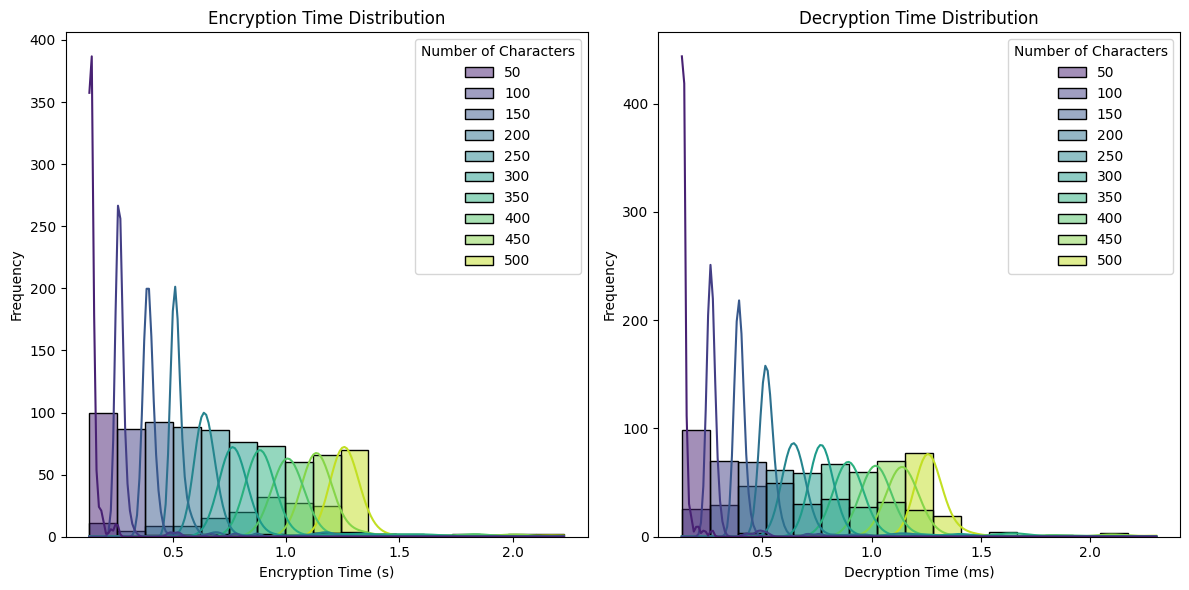

In [ ]:
import random
import string
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


text_list = []
length = range(50, 501, 50)

for i in range(100):
  for l in length:
    text_list.append(''.join(random.choices(string.ascii_uppercase + ' ',
                                            k = l)))

results = []

jam = JAMStreamCipher(2)
vigenere = VigenereCipher(key = ''.join(map(jam.ascii2text.get, jam.getKeys())))
des = DESCipher()

for text in text_list:
    # JAM cipher
    start_enc = time.perf_counter()
    encrypted_text_jam = jam.encrypt(text)
    end_enc = time.perf_counter()
    encryption_time_jam = end_enc - start_enc

    start_dec = time.perf_counter()
    decrypted_text_jam = jam.decrypt(encrypted_text_jam)
    end_dec = time.perf_counter()
    decryption_time_jam = end_dec - start_dec

    # Vigenere cipher
    start_enc = time.perf_counter()
    encrypted_text_vig = vigenere.encrypt(text)
    end_enc = time.perf_counter()
    encryption_time_vig = end_enc - start_enc

    start_dec = time.perf_counter()
    decrypted_text_vig = vigenere.decrypt(encrypted_text_vig)
    end_dec = time.perf_counter()
    decryption_time_vig = end_dec - start_dec

    # DES cipher
    start_enc = time.perf_counter()
    encrypted_text_des = des.encrypt(text)
    end_enc = time.perf_counter()
    encryption_time_des = end_enc - start_enc

    start_dec = time.perf_counter()
    decrypted_text_des = des.decrypt(encrypted_text_des)
    end_dec = time.perf_counter()
    decryption_time_des = end_dec - start_dec

    # Store the results
    results.append({
        "Real Text": text,
        "Encryption Time JAM": encryption_time_jam *1000,
        "Decryption Time JAM": decryption_time_jam *1000,
        "Encryption Time Vigenere": encryption_time_vig *1000,
        "Decryption Time Vigenere": decryption_time_vig *1000,
        "Encryption Time DES": encryption_time_des *1000,
        "Decryption Time DES": decryption_time_des *1000,
        "Number of Characters": len(text)
    })

df_time = pd.DataFrame(results)

palette = sns.color_palette("viridis",
                            len(df_time["Number of Characters"].unique()))
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = df_time,
             x = "Encryption Time JAM",
             hue = "Number of Characters",
             kde = True,
             palette = palette)
plt.title('Encryption Time Distribution')
plt.xlabel('Encryption Time (s)')
plt.ylabel('Frequency')

# Decryption histogram and density plot
plt.subplot(1, 2, 2)
sns.histplot(data = df_time,
             x = "Decryption Time JAM",
             hue = "Number of Characters",
             kde = True,
             palette = palette)
plt.title('Decryption Time Distribution')
plt.xlabel('Decryption Time (ms)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

mean_times = df_time.groupby('Number of Characters')[['Encryption Time JAM', 'Decryption Time JAM',
                                                      'Encryption Time Vigenere', 'Decryption Time Vigenere',
                                                      'Encryption Time DES', 'Decryption Time DES']].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Encryption Time JAM"],
                         mode = 'lines+markers',
                         name = 'JAM Encryption Time',
                         line = dict(color = 'blue')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Decryption Time JAM"],
                         mode = 'lines+markers',
                         name = 'JAM Decryption Time',
                         line = dict(color = 'dodgerblue')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Encryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'Vigenere Encryption Time',
                         line = dict(color = 'green')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Decryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'Vigenere Decryption Time',
                         line = dict(color = 'limegreen')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Encryption Time DES"],
                         mode = 'lines+markers',
                         name = 'DES Encryption Time',
                         line = dict(color = 'orange')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Decryption Time DES"],
                         mode = 'lines+markers',
                         name = 'DES Decryption Time',
                         line = dict(color = 'red')))

fig.update_layout(
    title = 'Mean Encryption and Decryption Times by Length for Different Ciphers',
    xaxis_title = 'Number of Characters',
    yaxis_title = 'Mean Time (ms)',
    legend_title = 'Operation and Cipher Type',
    template = 'plotly_white',
    hovermode = 'closest',
    xaxis = dict(tickmode = 'linear',
                 tick0 = 50,
                 dtick = 50),
    yaxis = dict(tickmode = 'linear',
                 tick0 = 0.2,
                 dtick = 0.2),
    font = dict(size = 12,
                color = "black"),
    title_font = dict(size = 16,
                      color = "black"),
)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Encryption Time JAM"] / mean_times["Encryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'Encryption Times Factor',
                         line = dict(color = 'blue')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Decryption Time JAM"] / mean_times["Decryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'Decryption Times Factor',
                         line = dict(color = 'red')))

fig.update_layout(
    title = 'Encryption and Decryption Times Factor for JAM Stream Cipher, relative to Vigenere Cipher',
    xaxis_title = 'Number of Characters',
    yaxis_title = 'Times Factor',
    legend_title = 'Operation and Cipher Type',
    template = 'plotly_white',
    hovermode = 'closest',
    xaxis = dict(tickmode = 'linear',
                 tick0 = 50,
                 dtick = 50),
    yaxis = dict(tickmode = 'linear',
                 tick0 = 0.2,
                 dtick = 0.2),
    font = dict(size = 12,
                color = "black"),
    title_font = dict(size = 16,
                      color = "black"),
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Encryption Time JAM"] / mean_times["Encryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'JAM Encryption Time',
                         line = dict(color = 'blue')))

fig.add_trace(go.Scatter(x = mean_times.index,
                         y = mean_times["Decryption Time JAM"] / mean_times["Decryption Time Vigenere"],
                         mode = 'lines+markers',
                         name = 'JAM Decryption Time',
                         line = dict(color = 'red')))

fig.update_layout(
    title = 'Encryption and Decryption Times Factor for JAM Stream Cipher, relative to Vigenere Cipher',
    xaxis_title = 'Number of Characters',
    yaxis_title = 'Times Factor',
    legend_title = 'Operation and Cipher Type',
    template = 'plotly_white',
    hovermode = 'closest',
    xaxis = dict(tickmode = 'linear',
                 tick0 = 50,
                 dtick = 50),
    yaxis = dict(tickmode = 'linear',
                 tick0 = 0.2,
                 dtick = 0.2),
    font = dict(size = 12,
                color = "black"),
    title_font = dict(size = 16,
                      color = "black"),
)

fig.show()